In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from virgo.cluster import VirgoCluster

%load_ext autoreload
%autoreload 2

%matplotlib notebook

<IPython.core.display.Javascript object>


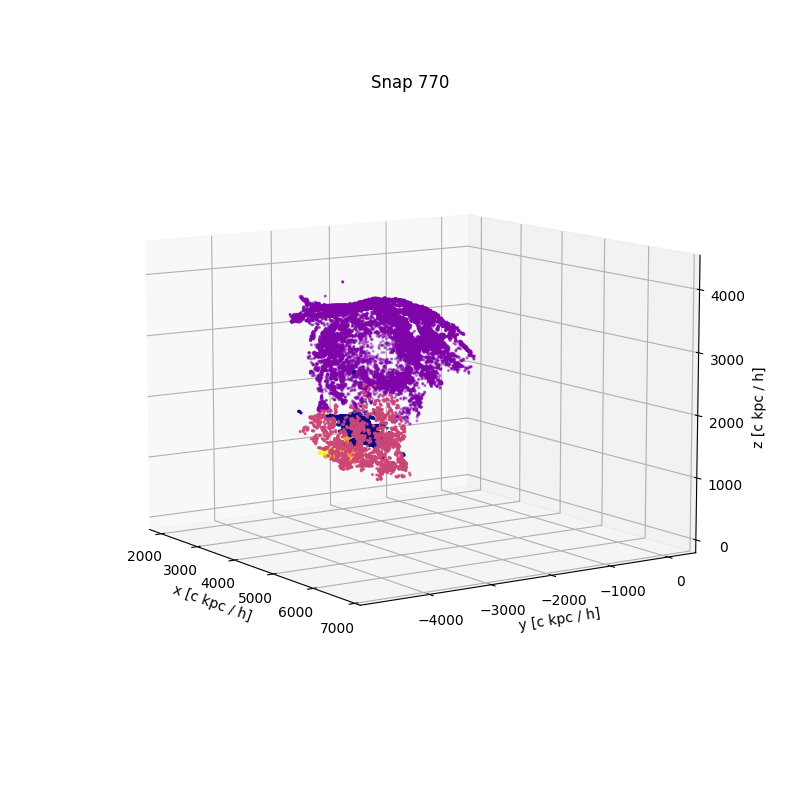

MovieWriter imagemagick unavailable; using Pillow instead.


0 750
1 750
2 750
3 750
4 750
5 750
6 750
7 750
8 750
9 750
10 750
11 750
12 750
13 750
14 750
15 750
16 750
17 750
18 750
19 750
20 750
21 750
22 750
23 750
24 750
25 750
26 750
27 750
28 750
29 750
30 750
31 760
32 760
33 760
34 760
35 760
36 760
37 760
38 760
39 760
40 760
41 760
42 760
43 760
44 760
45 760
46 760
47 760
48 760
49 760
50 760
51 760
52 760
53 760
54 760
55 760
56 760
57 760
58 760
59 760
60 760
61 770
62 770
63 770
64 770
65 770
66 770
67 770
68 770
69 770
70 770
71 770
72 770
73 770
74 770
75 770
76 770
77 770
78 770
79 770
80 770
81 770
82 770
83 770
84 770
85 770
86 770
87 770
88 770
89 770
90 770
91 780
92 780
93 780
94 780
95 780
96 780
97 780
98 780
99 780
100 780
101 780
102 780
103 780
104 780
105 780
106 780
107 780
108 780
109 780
110 780
111 780
112 780
113 780
114 780
115 780
116 780
117 780
118 780
119 780
120 780
121 790
122 790
123 790
124 790
125 790
126 790
127 790
128 790
129 790
130 790
131 790
132 790
133 790
134 790
135 790
136 790
137 790
138 79

In [4]:
store_gif = True
remove_uncertain= True
n_step=1
cluster_label = None
gif_title = None
axs_label = ["x [c kpc / h]", "y [c kpc / h]", "z [c kpc / h]"]
maker_size = 6.0

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection="3d")

def get_plot_data(snap_id: int):
    file_name = "/home/max/Software/virgo/demo_notebooks/vc_methodD_"
    virgo_cluster = VirgoCluster(None)
    virgo_cluster.cluster = np.loadtxt(f"{file_name}{int(snap_id)}_cluster.txt")
    virgo_cluster.cluster_labels = np.loadtxt(f"{file_name}{int(snap_id)}_cluster_labels.txt")
    plot_data = virgo_cluster.cluster[::n_step]
    plot_label = virgo_cluster.cluster_labels[::n_step]

    if remove_uncertain:
        uncertain_mask = plot_label >= 0
        plot_data = plot_data[uncertain_mask]
        plot_label = plot_label[uncertain_mask]

    if cluster_label is not None:
        for target_ind, target_label in enumerate(cluster_label):
            curr_data = plot_data[plot_label == target_label]
            curr_label = plot_label[plot_label == target_label]
            if target_ind == 0:
                plot_data_filt = curr_data
                plot_label_filt = curr_label
            else:
                plot_data_filt = np.concatenate([plot_data_filt, curr_data])
                plot_label_filt = np.concatenate([plot_label_filt, curr_label])

        plot_data = plot_data_filt
        plot_label = plot_label_filt
        
    return plot_data, plot_label



def animate(i=-60):
    snap = 750
    if i > 30:
        snap = 760
    if i > 60:
        snap = 770
    if i > 90:
        snap = 780
    if i > 120:
        snap = 790
    if i > 150:
        snap = 800
    if i > 180:
        snap = 810
    if i > 210:
        snap = 820
    print(i, snap)
    plot_data, plot_label = get_plot_data(snap)
    
    ax.cla()
    ax.title.set_text(f"Snap {snap}")
    ax.set(xlabel=axs_label[0], ylabel=axs_label[1], zlabel=axs_label[2])
    ax.set_xlim((1774.3607604980468, 7015.55903930664))
    ax.set_ylim((-4975.025365447998, 378.096150970459))
    ax.set_zlim((-112.7749122619629, 4446.502069854736))
    
    ax.scatter(
        plot_data.T[0],
        plot_data.T[1],
        plot_data.T[2],
        c=plot_label,
        marker=".",
        cmap="plasma",
        s=maker_size,
    )
    # azimuth angle : 0 deg to 360 deg
    ax.view_init(elev=10, azim=(-60 + i * 0.33))
#     print(ax.get_xlim())
#     print(ax.get_ylim())
#     print(ax.get_zlim())
    return (fig,)

def init():
    pass


if store_gif:
    # Animate
    ani = animation.FuncAnimation(
        fig, animate, init_func=init, frames=240, interval=100, blit=True
    )
    if gif_title is None:
        file_name = "test"
    else:
        file_name = gif_title
    ani.save(file_name + ".gif", writer="imagemagick", fps=15)
else:
    init()
    animate()

plt.show()